<a href="https://colab.research.google.com/github/EternalSorrrow/bak/blob/master/nn_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 MNIST CNN - Simple CNN

In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

data = mnist.load_data()

In [0]:
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


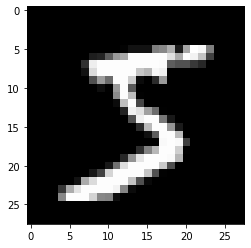

In [0]:
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

In [0]:
x_train = x_train.reshape((-1, 28, 28, 1)) # Reshape data since the Keras expects an array of 3d (not 2d) tensors on input
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [0]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [0]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) # !!! Doesn't work without dropout here

model.add(Flatten()) # ??? Why should we flatten the feature vector?

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 25

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/25
60000/60000 [==============================] - 3s 43us/step - loss: 1.9618 - acc: 0.8192
Epoch 2/25
60000/60000 [==============================] - 2s 30us/step - loss: 0.1279 - acc: 0.9602
Epoch 3/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.0906 - acc: 0.9715
Epoch 4/25
60000/60000 [==============================] - 2s 30us/step - loss: 0.0727 - acc: 0.9773
Epoch 5/25
60000/60000 [==============================] - 2s 30us/step - loss: 0.0614 - acc: 0.9803
Epoch 6/25
60000/60000 [==============================] - 2s 30us/step - loss: 0.0520 - acc: 0.9832
Epoch 7/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.0476 - acc: 0.9846
Epoch 8/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.0393 - acc: 0.9872
Epoch 9/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.0355 - acc: 0.9884
Epoch 10/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.0311 - acc: 0.9897

In [0]:
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.05813348390585916
Test accuracy: 0.985


Test loss: 0.05813348390585916
Test accuracy: 0.985

Nice!

More complex example: CIFAR-10 CNN

In [0]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

data = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


[59 62 63]


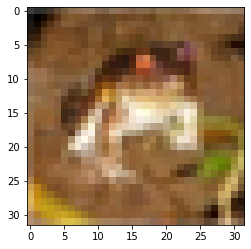

In [0]:
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

[0.23137255 0.24313725 0.24705882]


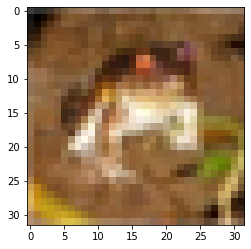

In [0]:
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Copy-pasted previous model with the changed input_shape to (32, 23, 3)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
50000/50000 [==============================] - 3s 68us/step - loss: 2.1312 - acc: 0.2261
Epoch 2/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.8992 - acc: 0.3286
Epoch 3/100
50000/50000 [==============================] - 2s 50us/step - loss: 1.7927 - acc: 0.3725
Epoch 4/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.7036 - acc: 0.4052
Epoch 5/100
50000/50000 [==============================] - 2s 50us/step - loss: 1.6227 - acc: 0.4309
Epoch 6/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.5473 - acc: 0.4588
Epoch 7/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4826 - acc: 0.4773
Epoch 8/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4256 - acc: 0.4975
Epoch 9/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3835 - acc: 0.5126
Epoch 10/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.3486 - a

In [0]:
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.9657731695175171
Test accuracy: 0.6775


Test loss: 0.9657731695175171
Test accuracy: 0.6775

Shouldn't expect more from the such primitive model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3,3), activation='relu')) # New convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.15)) #Dropout 0.25 -> 0.15

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) # Additional Conv-Conv-MaxPool pattern with 64 filters

model.add(Dropout(0.15))  #One more dropout layer

model.add(Flatten())

model.add(Dense(512, activation='relu')) #128 -> 512 neurons
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [122]:
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
50000/50000 [==============================] - 5s 107us/step - loss: 2.2804 - acc: 0.1438
Epoch 2/100
50000/50000 [==============================] - 4s 75us/step - loss: 2.0597 - acc: 0.2496
Epoch 3/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.9080 - acc: 0.3133
Epoch 4/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.7963 - acc: 0.3559
Epoch 5/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.7078 - acc: 0.3826
Epoch 6/100
50000/50000 [==============================] - 4s 77us/step - loss: 1.6466 - acc: 0.4057
Epoch 7/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.5894 - acc: 0.4268
Epoch 8/100
50000/50000 [==============================] - 4s 74us/step - loss: 1.5436 - acc: 0.4451
Epoch 9/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.4844 - acc: 0.4640
Epoch 10/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.4399 - 

In [123]:
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 1.0367052768707274
Test accuracy: 0.7355


Test loss: 1.0367052768707274
Test accuracy: 0.7355

There's still work to do...

Some notices:
- Dropouts have a drastic impact on a models's performance. Introduced models didn't work completely without them.
- Straightforward layer adding doesn't yield better result itself, with any added layer hyperparameter tuning to realize deeper model's potential becomes much more tedious. Sometimes it's much easier to build simpler model rather than tune more complex.